# Use Random Forest to prepare a model on fraud data

treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df = pd.read_csv("/content/Fraud_check.csv")
#Viewing top 5 rows of dataframe
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [4]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [5]:
print(df)

     Taxable.Income  City.Population  ...  Marital.Status_Single  Urban_YES
0             68833            50047  ...                      1          1
1             33700           134075  ...                      0          1
2             36925           160205  ...                      0          1
3             50190           193264  ...                      1          1
4             81002            27533  ...                      0          0
..              ...              ...  ...                    ...        ...
595           76340            39492  ...                      0          1
596           69967            55369  ...                      0          1
597           47334           154058  ...                      0          1
598           98592           180083  ...                      0          0
599           96519           158137  ...                      0          0

[600 rows x 7 columns]


In [6]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [7]:
print(df)

     Taxable.Income  City.Population  ...  Urban_YES  TaxInc
0             68833            50047  ...          1    Good
1             33700           134075  ...          1    Good
2             36925           160205  ...          1    Good
3             50190           193264  ...          1    Good
4             81002            27533  ...          0    Good
..              ...              ...  ...        ...     ...
595           76340            39492  ...          1    Good
596           69967            55369  ...          1    Good
597           47334           154058  ...          1    Good
598           98592           180083  ...          0    Good
599           96519           158137  ...          0    Good

[600 rows x 8 columns]


In [8]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Taxable.Income          600 non-null    int64   
 1   City.Population         600 non-null    int64   
 2   Work.Experience         600 non-null    int64   
 3   Undergrad_YES           600 non-null    uint8   
 4   Marital.Status_Married  600 non-null    uint8   
 5   Marital.Status_Single   600 non-null    uint8   
 6   Urban_YES               600 non-null    uint8   
 7   TaxInc                  600 non-null    category
dtypes: category(1), int64(3), uint8(4)
memory usage: 17.2 KB


In [9]:
print('The shape of our features is:', df.shape)

The shape of our features is: (600, 8)


In [10]:
df.isnull().any()

Taxable.Income            False
City.Population           False
Work.Experience           False
Undergrad_YES             False
Marital.Status_Married    False
Marital.Status_Single     False
Urban_YES                 False
TaxInc                    False
dtype: bool

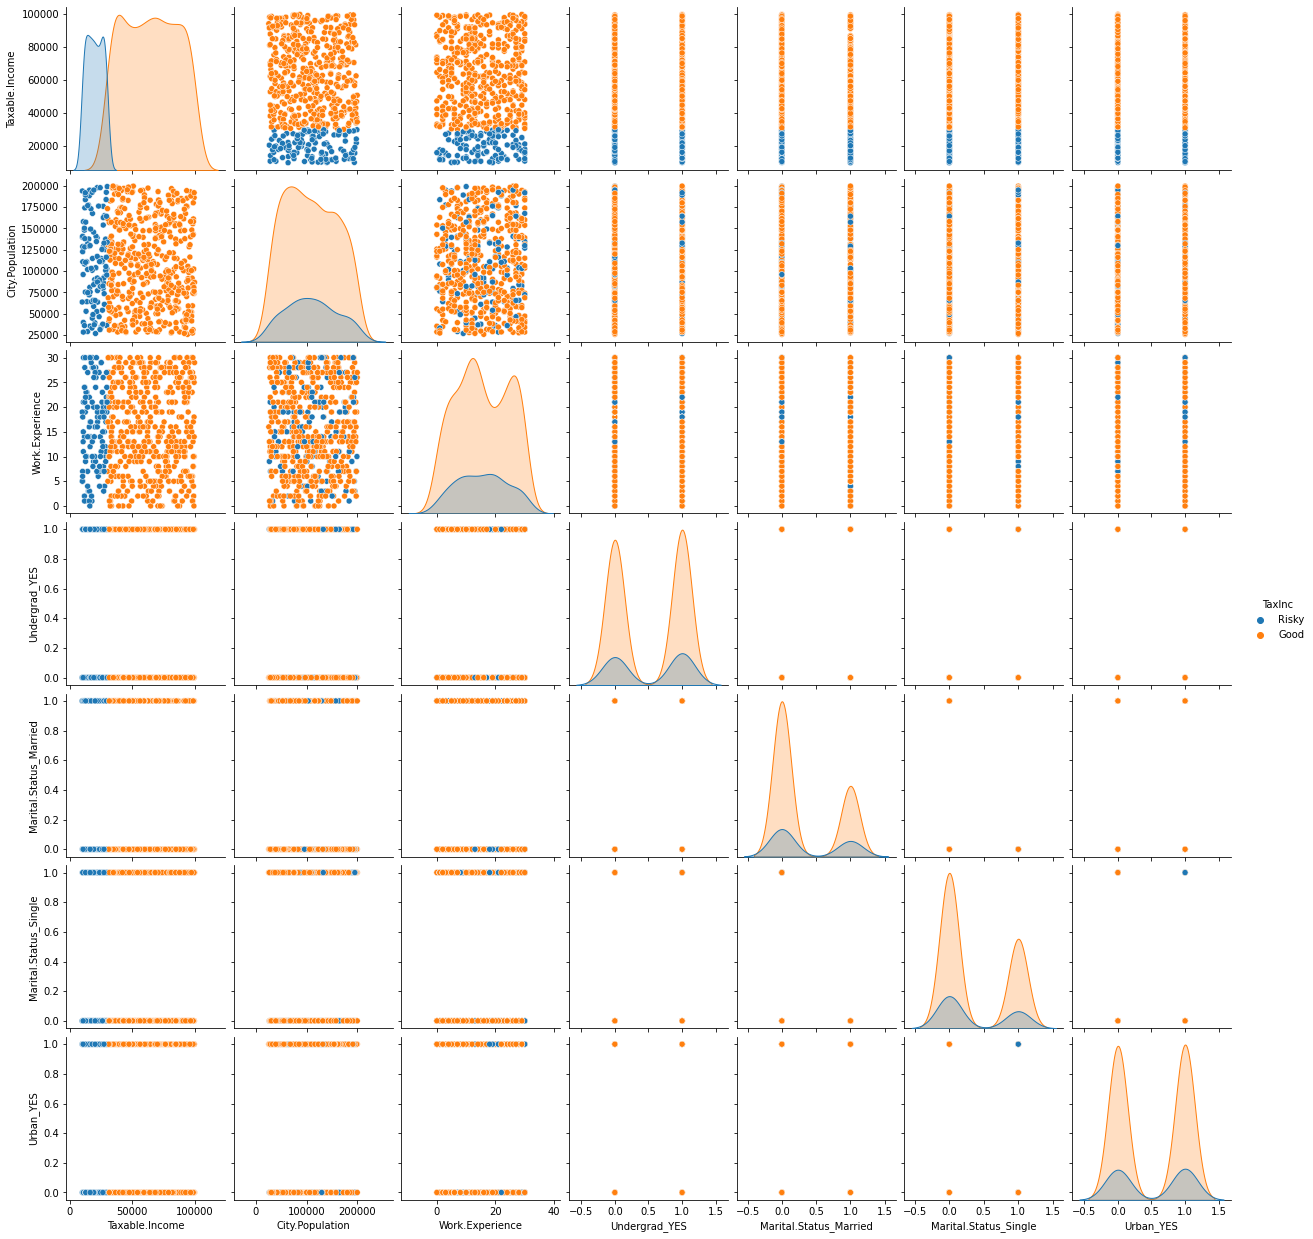

In [11]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data = df, hue = 'TaxInc')

Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [12]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [13]:
#Viewing buttom 10 observations
df.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


In [14]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [15]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [16]:
# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [17]:
x=df.iloc[:,0:6]
y=df['Work.Experience']
x

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
0,68833,50047,10,0,0,1
1,33700,134075,18,1,0,0
2,36925,160205,30,0,1,0
3,50190,193264,15,1,0,1
4,81002,27533,28,0,1,0
...,...,...,...,...,...,...
595,76340,39492,7,1,0,0
596,69967,55369,2,1,0,0
597,47334,154058,0,0,0,0
598,98592,180083,17,1,1,0


In [18]:
y

0      10
1      18
2      30
3      15
4      28
       ..
595     7
596     2
597     0
598    17
599    16
Name: Work.Experience, Length: 600, dtype: int64

In [19]:
df['Work.Experience'].unique()


array([10, 18, 30, 15, 28,  0,  8,  3, 12,  4, 19,  6, 14, 16, 13, 29, 25,
       26,  7, 27,  5, 21, 23,  1, 22,  2, 11,  9, 24, 17, 20])

In [20]:
colnames = list(df.columns)
colnames

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

In [21]:
colnames = list(df.columns)
colnames

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

In [22]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


In [23]:
# Labels are the values we want to predict
labels = np.array(df['City.Population'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('City.Population', axis = 1)
# Saving feature names for later use
feature_list = list(df.columns)
# Convert to numpy array
features = np.array(df)

In [24]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [25]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (450, 8)
Training Labels Shape: (450,)
Testing Features Shape: (150, 8)
Testing Labels Shape: (150,)


## Establish Baseline

In [26]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('Taxable.Income')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  60184.48


In [27]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [28]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 219.57 degrees.


## Determine Performance Metrics

In [29]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.73 %.


In [30]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [31]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [32]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: City.Population      Importance: 1.0
Variable: Taxable.Income       Importance: 0.0
Variable: Work.Experience      Importance: 0.0
Variable: Undergrad_YES        Importance: 0.0
Variable: Marital.Status_Married Importance: 0.0
Variable: Marital.Status_Single Importance: 0.0
Variable: Urban_YES            Importance: 0.0
Variable: TaxInc_Good          Importance: 0.0


In [33]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('Taxable.Income'), feature_list.index('City.Population')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 177.22 degrees.
Accuracy: 99.79 %.


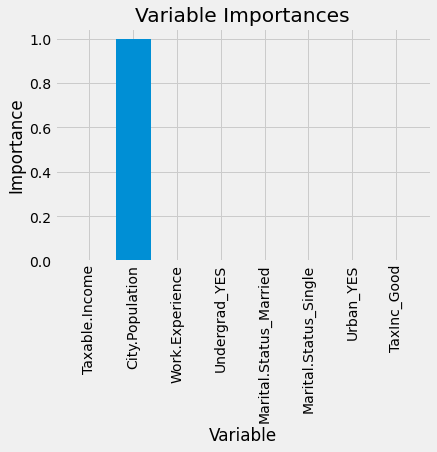

In [34]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

## RANDOM FOREST

In [37]:
#Choosing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier



In [40]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(n_estimators=200)

In [41]:
##Converting the Taxable income variable to bucketing. 
df["income"]="<=30000"
df.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [42]:
##Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [43]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode

In [44]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [45]:
##Splitting the data into featuers and labels
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [46]:
## Collecting the column names
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]

In [47]:
##Splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [48]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [49]:
model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=358588896),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1022729843),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=615491062),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1743963),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1615532251),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=990387769),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=168940650),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1052426320),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
             

In [50]:
model.classes_
model.n_features_
model.n_classes_

model.n_outputs_

model.oob_score_
###74.7833%

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


0.5458333333333333

In [51]:
##Predictions on train data
prediction = model.predict(x_train)

In [52]:
##Accuracy
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
##98.33%

In [53]:
import numpy as np
np.mean(prediction == y_train)
##98.33%

0.9833333333333333

In [54]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [55]:
##Prediction on test data
pred_test = model.predict(x_test)

In [56]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)
##78.333%

In [57]:
## In random forest we can plot a Decision tree present in Random forest
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [58]:
tree = model.estimators_[5]

In [59]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)

In [60]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [61]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [62]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [63]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [64]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0
